In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
df_assignments_ctrl = pd.read_csv('../XPlanningEvaluation/resources/mobilerobot/study/prefalign/mturk/assignments/assignments_control_full.csv')
df_assignments_expr = pd.read_csv('../XPlanningEvaluation/resources/mobilerobot/study/prefalign/mturk/assignments/assignments_experimental_full.csv')
df_answers_ctrl = pd.read_csv('../XPlanningEvaluation/resources/mobilerobot/study/prefalign/mturk/assignments/answerKey_control.csv')
df_answers_expr = pd.read_csv('../XPlanningEvaluation/resources/mobilerobot/study/prefalign/mturk/assignments/answerKey_experimental.csv')

In [4]:
df_assignments_ctrl.head()

,HIT Index,HIT ID,HITType ID,Assignment ID,Worker ID,Total Time (seconds),question0-ref,question0-total-cost,question0-answer,question0-confidence,question0-elapsedTime,question1-ref,question1-total-cost,question1-answer,question1-confidence,question1-elapsedTime,question2-ref,question2-total-cost,question2-answer,question2-confidence,question2-elapsedTime,question3-ref,question3-total-cost,question3-answer,question3-confidence,question3-elapsedTime
0,0,3BA7SXOG1LPO17RJMOEPLRAB3IOR82,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3PWWM24LHVXAK78SX04Q83YSQOR28Y,A7P3R1AIA4TVV,1106,question-mission12-agent0,181,yes,fairly,97353,question-mission85-agent0,108,yes,completely,14373,question-mission26-agent0,155,no,completely,39149,question-mission74-agent2,159.0,yes,somewhat,146259
1,0,3BA7SXOG1LPO17RJMOEPLRAB3IOR82,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3GFK2QRXXCGD95NXDMMUKQ4QS5L5WH,A1SIUJEL2LS8UO,1164,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,question-mission74-agent2,211.0,yes,somewhat,91468
2,0,3BA7SXOG1LPO17RJMOEPLRAB3IOR82,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,35BLDD71I9WY1U7HU0OENSS7MVTVZ6,A272X64FOZFYLB,722,question-mission12-agent0,206,yes,fairly,183265,question-mission85-agent0,108,yes,completely,60012,question-mission26-agent0,173,yes,fairly,80461,question-mission74-agent2,199.0,yes,fairly,73092
3,0,3BA7SXOG1LPO17RJMOEPLRAB3IOR82,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3WOKGM4L74F69PSUPUP8M1VD8WUO0O,A1DMXEJGJY02E1,721,question-mission12-agent0,189.8,no,completely,127270,question-mission85-agent0,108,yes,completely,36854,question-mission26-agent0,155,no,somewhat,80468,question-mission74-agent2,199.0,yes,fairly,24337
4,1,3UOMW19E6F518NJY6THRKC1Y1RRC5M,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3P4RDNWND853F9IDD7M9K9ENVWLIJE,A38Z99XF4NDNH0,471,question-mission13-agent0,186,no,slightly,93320,question-mission95-agent0,138,yes,somewhat,25818,question-mission75-agent0,181,no,completely,35327,question-mission54-agent0,303.0,no,completely,62365


In [5]:
df_assignments_expr.head()

,HIT Index,HIT ID,HITType ID,Assignment ID,Worker ID,Total Time (seconds),question0-ref,question0-total-cost,question0-answer,question0-confidence,question0-elapsedTime,question1-ref,question1-total-cost,question1-answer,question1-confidence,question1-elapsedTime,question2-ref,question2-total-cost,question2-answer,question2-confidence,question2-elapsedTime,question3-ref,question3-total-cost,question3-answer,question3-confidence,question3-elapsedTime
0,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,34FNN24DCP8HYAIXSN4I5NP63IDY5B,A3UF6XXFFRR237,1018,question-mission12-agent0-explanation,206.0,yes,fairly,235538,question-mission85-agent0-explanation,10,no,completely,28398,question-mission26-agent0-explanation,173.0,no,completely,100612,question-mission74-agent2-explanation,199.0,no,completely,146051
1,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,31T4R4OBOVFJIBVBKO1Q6GBJR0U7CV,A3D2GO0IFRFN6R,861,question-mission12-agent0-explanation,206.0,yes,completely,288066,question-mission85-agent0-explanation,108,yes,completely,38835,question-mission26-agent0-explanation,173.0,no,completely,82678,question-mission74-agent2-explanation,199.0,no,completely,69736
2,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,3D3VGR7TA3E5NUJ709OVIUYPMZER3J,AY7WPVKHVNBLG,1442,question-mission12-agent0-explanation,206.0,yes,somewhat,294507,question-mission85-agent0-explanation,108,yes,completely,43657,question-mission26-agent0-explanation,173.0,yes,slightly,124385,question-mission74-agent2-explanation,199.0,no,somewhat,98455
3,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,3TEM0PF1Q8WF5S15ZLBSB7JE4MD0D1,AEWPAZBYA7XE,885,question-mission12-agent0-explanation,206.0,yes,completely,444698,question-mission85-agent0-explanation,108,yes,completely,60877,question-mission26-agent0-explanation,173.0,no,completely,67961,question-mission74-agent2-explanation,199.0,no,completely,45301
4,1,3HJ1EVZS2QI20ALDA7JTUA20NXFR3V,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,3KKG4CDWKLXK1Q6P66TS1EQ1UEK94H,A1F34ZP6YNI98F,537,question-mission13-agent0-explanation,393.0,no,fairly,129827,question-mission95-agent0-explanation,108,yes,fairly,57762,question-mission75-agent0-explanation,335.0,yes,fairly,190742,question-mission54-agent0-explanation,303.0,yes,somewhat,51402


In [6]:
df_answers_ctrl.head()

,ref,total-cost,answer
0,question-mission59-agent4,708,no
1,question-mission80-agent0,108,yes
2,question-mission42-agent7,709,no
3,question-mission66-agent0,875,yes
4,question-mission45-agent7,220,no


In [7]:
df_answers_expr.head()

,ref,total-cost,answer
0,question-mission12-agent0-explanation,206,yes
1,question-mission85-agent0-explanation,108,yes
2,question-mission26-agent0-explanation,173,yes
3,question-mission74-agent2-explanation,199,no
4,question-mission13-agent0-explanation,393,yes


In [8]:
# Create columns for all data types for all questions
# Columns are named in the format: question[i]-[data_type_name]
def create_columns(data_types, num_questions):
    columns = []
    for i in range(num_questions):
        for data_type in data_types:
            columns.append('question' + str(i) + "-" + data_type)
    return columns

In [9]:
# Create columns for a single data type for all questions
# Columns are named in the format: question[i]-[data_type_name]
def create_columns_for_data_type(data_type, num_questions):
    return ['question' + str(i) + '-' + data_type for i in range(num_questions)]

In [10]:
# Remove any assignment (i.e., any row) that contains missing data of a given data type of any question
def remove_assignments_with_missing_data(df_assignments, data_type, num_questions):
    columns = create_columns_for_data_type(data_type, num_questions)
    non_numeric_df_assignments_columns = df_assignments.select_dtypes(exclude=['int','float']).columns
    non_numeric_columns = [column for column in columns if column in non_numeric_df_assignments_columns]
    for column in non_numeric_columns:
        df_assignments = df_assignments[df_assignments[column] != 'null']
    return df_assignments

In [11]:
def set_columns_type_to_numeric(df_assignments, data_type, num_questions):
    columns = create_columns_for_data_type(data_type, num_questions)
    df_assignments[columns] = df_assignments[columns].apply(pd.to_numeric)
    return df_assignments

In [12]:
df_assignments_ctrl = remove_assignments_with_missing_data(df_assignments_ctrl, 'total-cost', 4)
df_assignments_ctrl.head()

,HIT Index,HIT ID,HITType ID,Assignment ID,Worker ID,Total Time (seconds),question0-ref,question0-total-cost,question0-answer,question0-confidence,question0-elapsedTime,question1-ref,question1-total-cost,question1-answer,question1-confidence,question1-elapsedTime,question2-ref,question2-total-cost,question2-answer,question2-confidence,question2-elapsedTime,question3-ref,question3-total-cost,question3-answer,question3-confidence,question3-elapsedTime
0,0,3BA7SXOG1LPO17RJMOEPLRAB3IOR82,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3PWWM24LHVXAK78SX04Q83YSQOR28Y,A7P3R1AIA4TVV,1106,question-mission12-agent0,181,yes,fairly,97353,question-mission85-agent0,108,yes,completely,14373,question-mission26-agent0,155,no,completely,39149,question-mission74-agent2,159.0,yes,somewhat,146259
2,0,3BA7SXOG1LPO17RJMOEPLRAB3IOR82,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,35BLDD71I9WY1U7HU0OENSS7MVTVZ6,A272X64FOZFYLB,722,question-mission12-agent0,206,yes,fairly,183265,question-mission85-agent0,108,yes,completely,60012,question-mission26-agent0,173,yes,fairly,80461,question-mission74-agent2,199.0,yes,fairly,73092
3,0,3BA7SXOG1LPO17RJMOEPLRAB3IOR82,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3WOKGM4L74F69PSUPUP8M1VD8WUO0O,A1DMXEJGJY02E1,721,question-mission12-agent0,189.8,no,completely,127270,question-mission85-agent0,108,yes,completely,36854,question-mission26-agent0,155,no,somewhat,80468,question-mission74-agent2,199.0,yes,fairly,24337
4,1,3UOMW19E6F518NJY6THRKC1Y1RRC5M,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3P4RDNWND853F9IDD7M9K9ENVWLIJE,A38Z99XF4NDNH0,471,question-mission13-agent0,186,no,slightly,93320,question-mission95-agent0,138,yes,somewhat,25818,question-mission75-agent0,181,no,completely,35327,question-mission54-agent0,303.0,no,completely,62365
5,1,3UOMW19E6F518NJY6THRKC1Y1RRC5M,35280GTXAPQ35X4ZWHDC3QI4GWDOVS,3HRMW88U19PI9M7ICEAVUX68DWYM0Q,A1K5ILJMG439M5,1051,question-mission13-agent0,393,yes,somewhat,260413,question-mission95-agent0,108,yes,fairly,61612,question-mission75-agent0,335,yes,somewhat,139476,question-mission54-agent0,303.0,no,slightly,90964


In [13]:
df_assignments_expr = remove_assignments_with_missing_data(df_assignments_expr, 'total-cost', 4)
df_assignments_expr.head()

,HIT Index,HIT ID,HITType ID,Assignment ID,Worker ID,Total Time (seconds),question0-ref,question0-total-cost,question0-answer,question0-confidence,question0-elapsedTime,question1-ref,question1-total-cost,question1-answer,question1-confidence,question1-elapsedTime,question2-ref,question2-total-cost,question2-answer,question2-confidence,question2-elapsedTime,question3-ref,question3-total-cost,question3-answer,question3-confidence,question3-elapsedTime
0,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,34FNN24DCP8HYAIXSN4I5NP63IDY5B,A3UF6XXFFRR237,1018,question-mission12-agent0-explanation,206.0,yes,fairly,235538,question-mission85-agent0-explanation,10,no,completely,28398,question-mission26-agent0-explanation,173.0,no,completely,100612,question-mission74-agent2-explanation,199.0,no,completely,146051
1,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,31T4R4OBOVFJIBVBKO1Q6GBJR0U7CV,A3D2GO0IFRFN6R,861,question-mission12-agent0-explanation,206.0,yes,completely,288066,question-mission85-agent0-explanation,108,yes,completely,38835,question-mission26-agent0-explanation,173.0,no,completely,82678,question-mission74-agent2-explanation,199.0,no,completely,69736
2,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,3D3VGR7TA3E5NUJ709OVIUYPMZER3J,AY7WPVKHVNBLG,1442,question-mission12-agent0-explanation,206.0,yes,somewhat,294507,question-mission85-agent0-explanation,108,yes,completely,43657,question-mission26-agent0-explanation,173.0,yes,slightly,124385,question-mission74-agent2-explanation,199.0,no,somewhat,98455
3,0,3RWO3EJELJ8LEURJAB1L1MNOOVB1PJ,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,3TEM0PF1Q8WF5S15ZLBSB7JE4MD0D1,AEWPAZBYA7XE,885,question-mission12-agent0-explanation,206.0,yes,completely,444698,question-mission85-agent0-explanation,108,yes,completely,60877,question-mission26-agent0-explanation,173.0,no,completely,67961,question-mission74-agent2-explanation,199.0,no,completely,45301
4,1,3HJ1EVZS2QI20ALDA7JTUA20NXFR3V,3K1KXTVNBMKZJI3PCNEA4YMJWSSM1N,3KKG4CDWKLXK1Q6P66TS1EQ1UEK94H,A1F34ZP6YNI98F,537,question-mission13-agent0-explanation,393.0,no,fairly,129827,question-mission95-agent0-explanation,108,yes,fairly,57762,question-mission75-agent0-explanation,335.0,yes,fairly,190742,question-mission54-agent0-explanation,303.0,yes,somewhat,51402


In [14]:
# Compute accuracy of total-cost (in %error) and answer (correct/incorrect) for each question, from each worker
def compute_accuracy(df_assignments, df_answers):
    # Accuracy of total-cost (%error) and answer (correct/incorrect) from workers
    accuracy_columns = create_columns(['ref', 'total-cost', 'answer'], 4)
    df_accuracy = pd.DataFrame(columns=accuracy_columns)
    
    # Data columns of interest for each question: ref, total-cost, answer
    ref_columns = create_columns_for_data_type('ref', 4)
    total_cost_columns = create_columns_for_data_type('total-cost', 4)
    answer_columns = create_columns_for_data_type('answer', 4)
    
    df_assignments = set_columns_type_to_numeric(df_assignments, 'total-cost', 4)
    
    for index, row in df_assignments.iterrows():
        # ref: question-mission[i]-agent[j] is shared between assignments and answerKey tables
        df_answer_key = df_answers[df_answers.ref.isin(row[ref_columns])]

        # Accuracy of total-cost and answer from workers
        worker_acc_dict = {'HIT ID': row['HIT ID'], 'Worker ID': row['Worker ID']}

        for i in range(4):
            ref_column = ref_columns[i] # question[i]-ref
            total_cost_column = total_cost_columns[i] # question[i]-total-cost
            answer_column = answer_columns[i] # question[i]-answer

            # total-cost and %error
            worker_total_cost = row[total_cost_column]
            correct_total_cost = df_answer_key[df_answer_key.ref == row[ref_column]].iloc[0]['total-cost']
            total_cost_err = abs((correct_total_cost - worker_total_cost) / correct_total_cost)

            # answer and correct/incorrect
            worker_answer = row[answer_column]
            correct_answer = df_answer_key[df_answer_key.ref == row[ref_column]].iloc[0]['answer']
            answer_acc = 1 if worker_answer == correct_answer else 0

            # Accuracy dict
            worker_acc_dict[ref_column] = row[ref_column]
            worker_acc_dict[total_cost_column] = total_cost_err
            worker_acc_dict[answer_column] = answer_acc

        df_accuracy = df_accuracy.append(worker_acc_dict, ignore_index=True)
    return df_accuracy

In [15]:
df_accuracy_ctrl = compute_accuracy(df_assignments_ctrl, df_answers_ctrl)
print(df_accuracy_ctrl)

                question0-ref  question0-total-cost  question0-answer  \
0   question-mission12-agent0              0.121359               1.0   
1   question-mission12-agent0              0.000000               1.0   
2   question-mission12-agent0              0.078641               0.0   
3   question-mission13-agent0              0.526718               0.0   
4   question-mission13-agent0              0.000000               1.0   
5   question-mission13-agent0              0.000000               1.0   
6   question-mission24-agent0              0.000000               0.0   
7   question-mission24-agent0              0.000000               1.0   
8   question-mission24-agent0              0.000000               1.0   
9   question-mission24-agent0              0.000000               1.0   
10  question-mission25-agent2              0.307317               0.0   
11  question-mission25-agent2              0.000000               0.0   
12  question-mission25-agent2              0.439024

In [16]:
df_accuracy_expr = compute_accuracy(df_assignments_expr, df_answers_expr)
print(df_accuracy_expr)

                            question0-ref  question0-total-cost  \
0   question-mission12-agent0-explanation              0.000000   
1   question-mission12-agent0-explanation              0.000000   
2   question-mission12-agent0-explanation              0.000000   
3   question-mission12-agent0-explanation              0.000000   
4   question-mission13-agent0-explanation              0.000000   
5   question-mission13-agent0-explanation              0.000000   
6   question-mission13-agent0-explanation              0.000000   
7   question-mission24-agent0-explanation              0.000000   
8   question-mission24-agent0-explanation              0.166667   
9   question-mission24-agent0-explanation              2.098765   
10  question-mission24-agent0-explanation              0.000000   
11  question-mission25-agent2-explanation              0.000000   
12  question-mission25-agent2-explanation              0.307317   
13  question-mission25-agent2-explanation              0.00000

In [17]:
def compute_score(df_assignments, df_answers):
    # Score of answer-confidence combination
    score_columns = create_columns(['ref', 'confidence'], 4)
    df_score = pd.DataFrame(columns=score_columns)

    confidence_abs_scores = {'none': 0, 'slightly': 1, 'somewhat': 2, 'fairly': 3, 'completely': 4}
    
    # Data columns of interest for each question: ref, answer, confidence
    ref_columns = create_columns_for_data_type('ref', 4)
    answer_columns = create_columns_for_data_type('answer', 4)
    confidence_columns = create_columns_for_data_type('confidence', 4)

    for index, row in df_assignments.iterrows():
        # ref: question-mission[i]-agent[j] is shared between assignments and answerKey tables
        df_answer_key = df_answers[df_answers.ref.isin(row[ref_columns])]

        # Score of answer-confidence combination
        worker_score_dict = {'HIT ID': row['HIT ID'], 'Worker ID': row['Worker ID']}

        for i in range(4):
            ref_column = ref_columns[i] # question[i]-ref
            answer_column = answer_columns[i] # question[i]-answer
            confidence_column = confidence_columns[i] # question[i]-confidence

            # answer and correct/incorrect
            worker_answer = row[answer_column]
            correct_answer = df_answer_key[df_answer_key.ref == row[ref_column]].iloc[0]['answer']
            answer_acc = worker_answer == correct_answer

            # confidence and score
            worker_confidence = row[confidence_column]
            score = confidence_abs_scores[worker_confidence] if answer_acc else -1 * confidence_abs_scores[worker_confidence]

            # Score dict
            worker_score_dict[ref_column] = row[ref_column]
            worker_score_dict[confidence_column] = score

        df_score = df_score.append(worker_score_dict, ignore_index=True)
    return df_score

In [18]:
df_score_ctrl = compute_score(df_assignments_ctrl, df_answers_ctrl)
print(df_score_ctrl)

                question0-ref  question0-confidence  \
0   question-mission12-agent0                   3.0   
1   question-mission12-agent0                   3.0   
2   question-mission12-agent0                  -4.0   
3   question-mission13-agent0                  -1.0   
4   question-mission13-agent0                   2.0   
5   question-mission13-agent0                   2.0   
6   question-mission24-agent0                  -2.0   
7   question-mission24-agent0                   3.0   
8   question-mission24-agent0                   3.0   
9   question-mission24-agent0                   3.0   
10  question-mission25-agent2                  -3.0   
11  question-mission25-agent2                  -3.0   
12  question-mission25-agent2                  -3.0   
13  question-mission34-agent1                   3.0   
14  question-mission34-agent1                   0.0   
15  question-mission34-agent1                  -4.0   
16  question-mission35-agent0                   2.0   
17  questi

In [19]:
df_score_expr = compute_score(df_assignments_expr, df_answers_expr)
print(df_score_expr)

                            question0-ref  question0-confidence  \
0   question-mission12-agent0-explanation                   3.0   
1   question-mission12-agent0-explanation                   4.0   
2   question-mission12-agent0-explanation                   2.0   
3   question-mission12-agent0-explanation                   4.0   
4   question-mission13-agent0-explanation                  -3.0   
5   question-mission13-agent0-explanation                  -1.0   
6   question-mission13-agent0-explanation                  -2.0   
7   question-mission24-agent0-explanation                   4.0   
8   question-mission24-agent0-explanation                   3.0   
9   question-mission24-agent0-explanation                   1.0   
10  question-mission24-agent0-explanation                   1.0   
11  question-mission25-agent2-explanation                   3.0   
12  question-mission25-agent2-explanation                  -3.0   
13  question-mission25-agent2-explanation                  -2.

In [20]:
def compute_statistics(df, data_type, num_questions, ignore_columns):
    average_column_name = 'average-' + data_type
    columns = create_columns_for_data_type(data_type, num_questions)
    selected_columns = [column for column in columns if column not in ignore_columns]
    df[average_column_name] = df[selected_columns].mean(axis=1)
    mean = df[average_column_name].mean()
    std = df[average_column_name].std()
    return mean, std, df[average_column_name]

In [21]:
score_mean_ctrl, score_std_ctrl, scores_ctrl = compute_statistics(df_score_ctrl, 'confidence', 4, ['question1-confidence'])
score_mean_expr, score_std_expr, scores_expr = compute_statistics(df_score_expr, 'confidence', 4, ['question1-confidence'])
print('Score statistics:')
print('Control group: mean=%f, std=%f' % (score_mean_ctrl, score_std_ctrl))
print('Experimental group: mean=%f, std=%f' % (score_mean_expr, score_std_expr))

Score statistics:
Control group: mean=0.346939, std=2.038926
Experimental group: mean=2.000000, std=1.715234


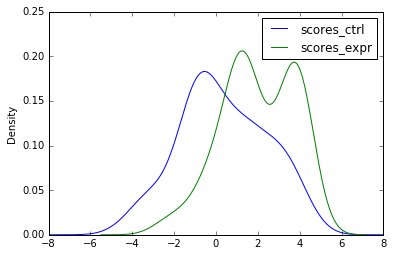

In [22]:
df_scores = pd.DataFrame({'scores_ctrl': scores_ctrl, 'scores_expr': scores_expr})
ax_scores = df_scores.plot.kde()

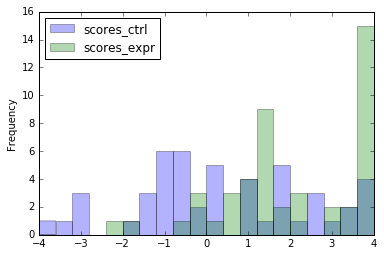

In [23]:
axhist_scores = df_scores.plot.hist(bins=20, alpha=0.3)

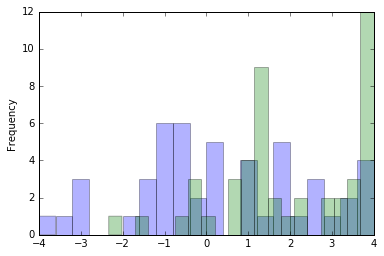

In [24]:
scores_ctrl.plot.hist(bins=20, alpha=0.3)
scores_expr.plot.hist(bins=20, alpha=0.3)

In [25]:
acc_mean_ctrl, acc_std_ctrl, accs_ctrl = compute_statistics(df_accuracy_ctrl, 'answer', 4, ['question1-answer'])
acc_mean_expr, acc_std_expr, accs_expr = compute_statistics(df_accuracy_expr, 'answer', 4, ['question1-answer'])
print('Accuracy statistics:')
print('Control group: mean=%f, std=%f' % (acc_mean_ctrl, acc_std_ctrl))
print('Experimental group: mean=%f, std=%f' % (acc_mean_expr, acc_std_expr))

Accuracy statistics:
Control group: mean=0.557823, std=0.329054
Experimental group: mean=0.794326, std=0.236247


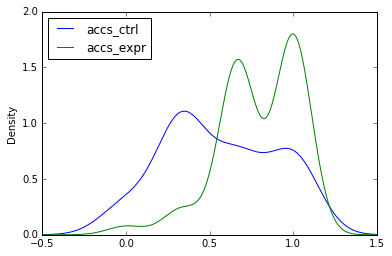

In [26]:
df_accs = pd.DataFrame({'accs_ctrl': accs_ctrl, 'accs_expr': accs_expr})
ax_accs = df_accs.plot.kde()

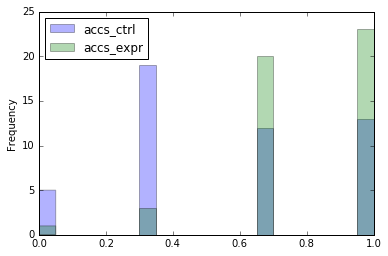

In [27]:
axhist_accs = df_accs.plot.hist(bins=20, alpha=0.3)

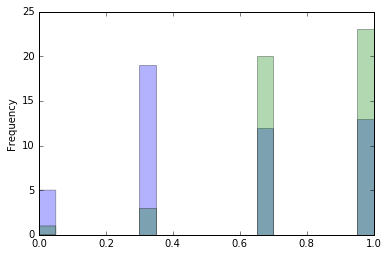

In [28]:
accs_ctrl.plot.hist(bins=20, alpha=0.3)
accs_expr.plot.hist(bins=20, alpha=0.3)

In [29]:
df_scores

,scores_ctrl,scores_expr
0,-1.000000,1.000000
1,1.000000,1.333333
2,-3.000000,1.666667
3,-3.000000,1.333333
4,1.000000,0.666667
5,2.666667,-0.333333
6,-0.333333,1.000000
7,3.333333,4.000000
8,1.666667,2.000000
9,3.000000,2.333333


In [30]:
df_accs

,accs_ctrl,accs_expr
0,0.333333,0.666667
1,0.666667,0.666667
2,0.000000,1.000000
3,0.000000,0.666667
4,0.666667,0.666667
5,1.000000,0.333333
6,0.333333,0.666667
7,1.000000,1.000000
8,0.666667,1.000000
9,1.000000,1.000000
